**K Nearest Neighbors (KNN)**



K Nearest Neighbors is a simple yet effective supervised machine learning algorithm used for classification and regression tasks:

**Principle**: KNN works based on the idea that similar data points tend to exist in close proximity in the feature space. It classifies or predicts the value of a new data point by considering its proximity to known data points in the training dataset.

**Algorithm**: For classification, when given a new data point, KNN identifies the K nearest neighbors to that point based on a chosen distance metric (like Euclidean distance). It then assigns a class label to the new point based on the majority class among its K nearest neighbors.

For regression, KNN predicts the value for the new data point by averaging or taking the mean of the values of its K nearest neighbors.

**Hyperparameter K**: The 'K' in KNN refers to the number of neighbors to consider when making predictions. Selecting an appropriate K is crucial. Smaller K values might lead to noise sensitivity, while larger K values could lead to smoother decision boundaries but might overlook local patterns.

**Non-parametric & Instance-based**: KNN is a non-parametric algorithm, meaning it doesn't make underlying assumptions about the distribution of data. It's also instance-based as it stores the entire training dataset and performs computation at prediction time based on stored instances.

**Pros and Cons**:

Pros: Simple to understand and implement, versatile for both classification and regression tasks, and robust to noisy data.
Cons: Computationally intensive during prediction (especially with larger datasets), sensitive to irrelevant or redundant features, and requires careful selection of the distance metric and K value.

In [1]:
# Essential libraries for numerical operations
import numpy as np  # Fundamental linear algebra functions
import pandas as pd  # Data processing using CSV files
import time  # Time-related functionalities

# Visualization libraries
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting functionalities

# Sklearn components for data preprocessing, modeling, and evaluation
from sklearn import preprocessing  # Data preprocessing tools
from sklearn.preprocessing import StandardScaler  # Standardization of data
from sklearn.model_selection import train_test_split  # Splitting data for training and testing
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier model
from sklearn.neighbors import KNeighborsRegressor  # KNN regressor model
from sklearn.metrics import classification_report  # Classification evaluation metrics
from sklearn.metrics import mean_squared_error  # Regression evaluation metric
from sklearn.metrics import accuracy_score  # Accuracy evaluation
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification
from sklearn.metrics import roc_curve, roc_auc_score  # ROC curve and AUC score
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction

# Importing the dataset as a dataframe
df = pd.read_csv("/content/sample_data/IBMEmployeeAttrition.csv")

Pre-processing is a crucial step in preparing data for machine learning models like K-Nearest Neighbors (KNN). In the context of KNN, pre-processing involves several steps such as handling missing values, scaling features, and encoding categorical variables into a format suitable for the algorithm.

One aspect of this process involves removing variables with zero variance. These are features that don't change across the dataset, meaning they have constant values. Removing such features is essential as they provide no discriminatory information to the model and might even lead to computational issues.

In [2]:
# Dropping columns with zero variance: 'EmployeeCount', 'Over18', and 'StandardHours'
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Replacing 'Yes'/'No' in the target variable 'Attrition' with binary values '1'/'0'
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})


In [3]:
# Dropping correlated variables: 'JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager', 'PercentSalaryHike'
df_final = df.drop(['JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager', 'PercentSalaryHike'], axis=1)

# Confirming the successful removal of these variables by displaying the updated DataFrame
df_final


,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,19479,8,Yes,3,1,0,0,1,6,0
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,24907,1,No,4,4,1,3,3,10,1
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,23159,1,Yes,3,3,0,3,3,8,3
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,12290,4,No,3,3,1,3,3,5,0
1466,1467,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,21457,4,No,3,1,1,5,3,7,1
1467,1468,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,5174,1,Yes,4,2,1,0,3,6,0
1468,1469,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,13243,2,No,3,4,0,3,2,9,0


In [4]:
# Function to preprocess categorical variables using LabelEncoder
def preprocessor(df):
    processed_df = df.copy()  # Create a copy of the dataset

    # Initialize LabelEncoder
    le = preprocessing.LabelEncoder()

    # Apply LabelEncoder to categorical columns
    processed_df['BusinessTravel'] = le.fit_transform(processed_df['BusinessTravel'])
    processed_df['Department'] = le.fit_transform(processed_df['Department'])
    processed_df['Education'] = le.fit_transform(processed_df['Education'])
    processed_df['EducationField'] = le.fit_transform(processed_df['EducationField'])
    processed_df['JobRole'] = le.fit_transform(processed_df['JobRole'])
    processed_df['Gender'] = le.fit_transform(processed_df['Gender'])
    processed_df['MaritalStatus'] = le.fit_transform(processed_df['MaritalStatus'])
    processed_df['OverTime'] = le.fit_transform(processed_df['OverTime'])
    processed_df['Attrition'] = le.fit_transform(processed_df['Attrition'])

    return processed_df  # Return the processed dataset

# Preprocess the desired dataset using the preprocessor function
encoded_df = preprocessor(df)


In [5]:
#Selecting features
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [6]:
# Standardizing features using StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)  # Standardize the dataset 'X'

# Check the new mean and standard deviation of the standardized dataset
mean = np.mean(X, axis=0)  # Calculate the mean along each column
print('New Mean: (%d, %d)' % (mean[0], mean[1]))  # Print the new mean values
standard_deviation = np.std(X, axis=0)  # Calculate the standard deviation along each column
print('New Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))  # Print the new standard deviation values


New Mean: (0, 0)
New Standard deviation: (1, 1)


# Splitting Data

 Splitting data into training and test sets is a fundamental step in machine learning. For K-Nearest Neighbors (KNN) specifically, it's crucial to divide the dataset into two subsets: the training set, used to build the KNN model, and the test set, employed to evaluate its performance. Sklearn's KNeighborsClassifier, a powerful tool, aids in this process by determining the optimal number of neighbors that minimize misclassification errors during model training. By splitting the data, the model learns from the training set's patterns and relationships, and the test set serves as an independent benchmark to gauge how well the model generalizes to new, unseen data. This separation ensures that the model's performance is assessed accurately and that it can make reliable predictions when exposed to real-world, unknown instances.







In [7]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

# Classification

Classification is a vital task in machine learning that involves assigning predefined categories or labels to data points based on their features. Its primary objective is to develop models that can learn patterns from labeled datasets and accurately predict the class or category of new, unseen instances. These models work by analyzing the relationships between input features and their corresponding labels to create decision boundaries that separate different classes. Commonly used classification algorithms, such as logistic regression, decision trees, random forests, support vector machines (SVM), and K-Nearest Neighbors (KNN), vary in complexity and approach but share the goal of effectively categorizing data. Evaluation metrics like accuracy, precision, recall, and F1-score help assess the model's performance in correctly classifying instances, making classification a cornerstone in various fields, including healthcare, finance, image recognition, and natural language processing.

In [8]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Set up a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


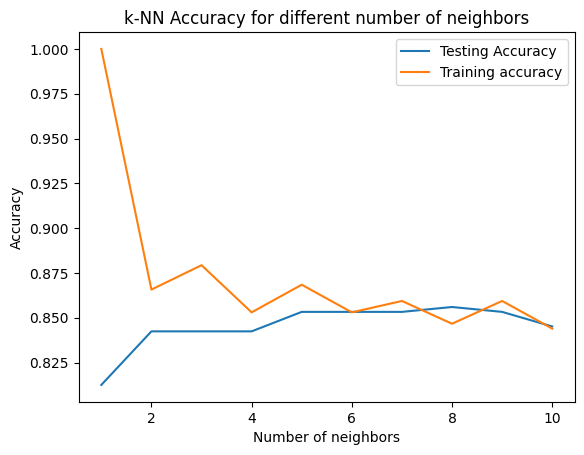

In [9]:
#Plot test accuracy to find the optimal k
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Record the starting time
start = time.time()

# Instantiate the KNN model with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the KNN model using the training data
knn.fit(X_train, y_train)

# Record the ending time
end = time.time()

# Calculate the time taken to train the KNN model
knn_time = end - start

# Display the training time in seconds for KNN without PCA
print('Train Time (seconds) of KNN without PCA:', knn_time)

# Use the trained KNN model to predict on test data
y_pred_knn = knn.predict(X_test)


Train Time (seconds) of KNN without PCA: 0.002817869186401367


# Performance Analysis

Performance analysis in machine learning involves evaluating how well a model performs on unseen data. The confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the number of correct and incorrect predictions made by the model, providing insights into the model's behavior. From the confusion matrix, metrics like accuracy, precision, recall, and F1-score can be derived, aiding in understanding the model's performance across different classes.

Accuracy: 0.8532608695652174


Text(0.5, 427.9555555555555, 'Predicted label')

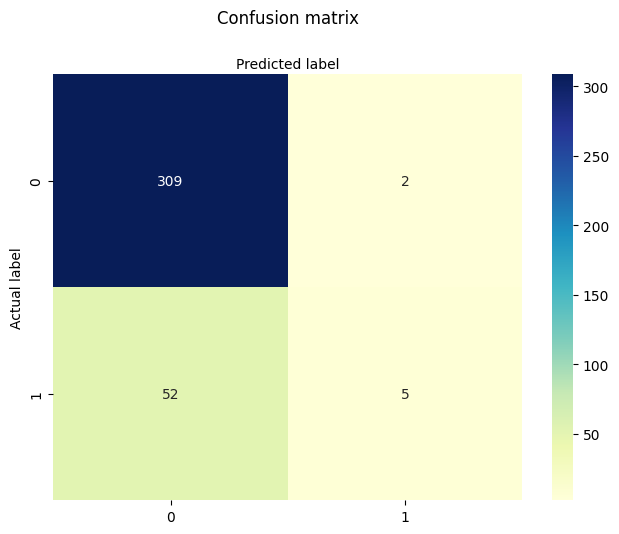

In [11]:
# Calculate and print the accuracy score of the KNN model on the test data
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# Create the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
class_names = [0, 1]  # Names of classes (e.g., 0 and 1)

# Create the figure for plotting the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Generate the heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')  # Use a heatmap to display values with colors
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)  # Set title of the confusion matrix plot
plt.ylabel('Actual label')  # Label for the actual values
plt.xlabel('Predicted label')  # Label for the predicted values



Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.71      0.09      0.16        57

    accuracy                           0.85       368
   macro avg       0.79      0.54      0.54       368
weighted avg       0.83      0.85      0.80       368



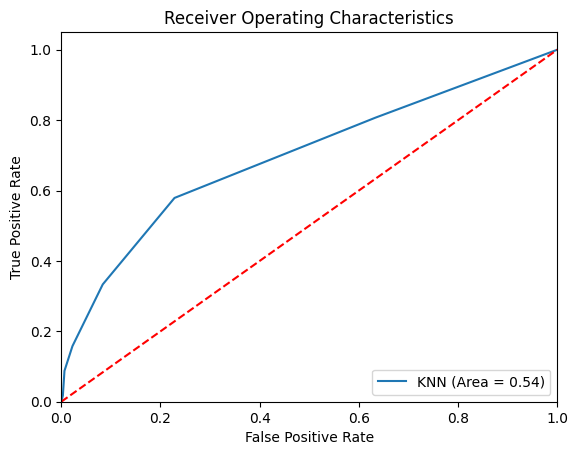

In [12]:
# Print a nicely formatted classification report
classify_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report")
print(classify_knn)

# Plot the Receiver Operating Characteristic (ROC) curve
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)  # Plotting the KNN ROC curve
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line indicating random chance
plt.xlim([0.0, 1.0])  # X-axis limits
plt.ylim([0.0, 1.05])  # Y-axis limits
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Receiver Operating Characteristics')  # Title of the plot
plt.legend(loc="lower right")  # Adding a legend to the plot
plt.show()  # Display the ROC curve


# Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. It works by transforming high-dimensional data into a lower-dimensional space while retaining as much variance as possible. PCA identifies the principal components, which are orthogonal vectors that represent the directions of maximum variance in the data. By ranking these components based on their variance, PCA allows the data to be projected onto a lower-dimensional subspace, simplifying its complexity and facilitating easier visualization without losing critical information. This method is valuable for reducing computational complexity, removing correlated features, and improving model performance by focusing on the most significant aspects of the data.

In [15]:
# Create an instance of the PCA model specifying the variance to be retained
variance_retained = 90
pca = PCA(n_components=variance_retained / 100)

# Fit PCA on the training set
pca.fit(X_train)

# Display the number of components needed to retain the specified variance
print(f"To retain {variance_retained}% of the variation, {pca.n_components_} components are needed")

# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


To retain 90% of the variation, 22 components are needed


In [16]:
#K Nearest Neighbors Classifier with PCA
#Because we previously used n = 9, we will use the same n here

start = time.time()

knn_pca = KNeighborsClassifier(n_neighbors=9)
knn_pca.fit(X_train_pca, y_train)

end = time.time()
knn_time_pca = end-start
print('Train Time (seconds) of KNN with PCA:',knn_time_pca)

y_pred_knn_pca = knn_pca.predict(X_test_pca)

Train Time (seconds) of KNN with PCA: 0.011516094207763672


Accuracy: 0.8586956521739131


Text(0.5, 427.9555555555555, 'Predicted label')

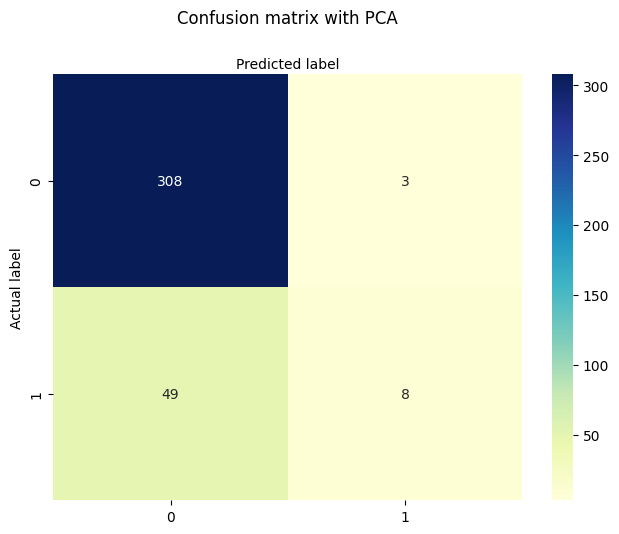

In [17]:
print("Accuracy:", accuracy_score(y_test,y_pred_knn_pca))
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
# Generate and display a formatted classification report
classification_report_knn = classification_report(y_test, y_pred_knn_pca)
print("\nClassification Report:")
print(classification_report_knn)



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.73      0.14      0.24        57

    accuracy                           0.86       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.86      0.82       368



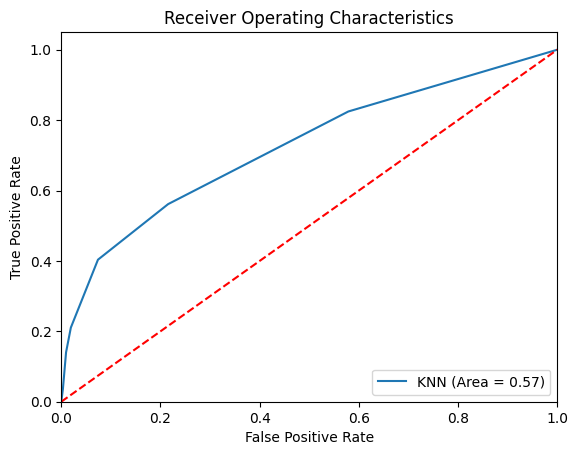

In [19]:
# Calculate ROC AUC score and plot the ROC curve
knn_roc_auc_pca = roc_auc_score(y_test, y_pred_knn_pca)
fpr, tpr, thresholds = roc_curve(y_test, knn_pca.predict_proba(X_test_pca)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc_pca)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()


# Regression

Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. Its primary goal is to understand how the value of the dependent variable changes concerning the independent variable(s). In simpler terms, regression helps predict continuous numeric outcomes, like estimating sales based on advertising spending, predicting house prices based on various features, or forecasting stock prices based on historical data. It encompasses various techniques like linear regression, polynomial regression, logistic regression, and more, each suited to different types of data and prediction tasks.

Training Root Mean Squared Error: 0.27111385490795004
Testing Root Mean Squared Error: 0.37830667721966726


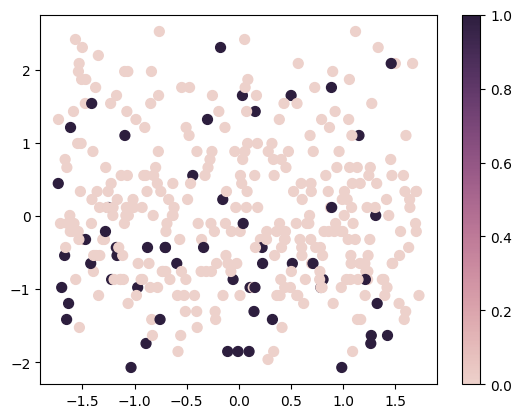

In [22]:
# Instantiate the K-Nearest Neighbors Regressor model with 3 neighbors
knn_model = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data
knn_model.fit(X_train, y_train)

# Predict on the training set
train_preds = knn_model.predict(X_train)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training data
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)

# Display the Training Root Mean Squared Error
print("Training Root Mean Squared Error:", rmse)

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
print('Testing Root Mean Squared Error:', rmse)

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()
